-------------------------------------------------------

Classifier report for PC=100, k=100, SVM parameters=(1, 2, 0.001, 'poly')



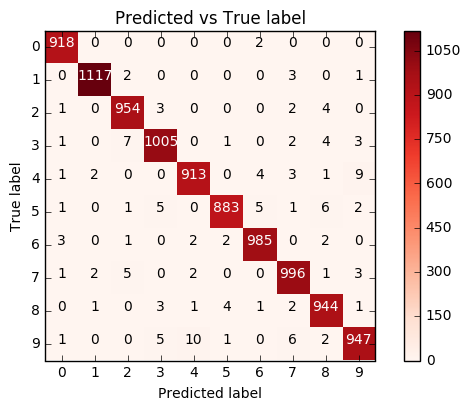


Accuracy score:
0.985817773697

Error per digit:
0.00217391304348
0.0053428317008
0.0103734439834
0.0175953079179
0.021436227224
0.0232300884956
0.0100502512563
0.0138613861386
0.0135841170324
0.0257201646091

-------------------------------------------------------



In [11]:
from itertools import product
import matplotlib.pyplot as plt
import numpy as np
import pickle
from sklearn.metrics import accuracy_score, confusion_matrix

def plot_confusion_matrix(cm, classes, title, cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
params = pickle.load(open('params_best.pkl', 'r'))
y_test = pickle.load(open('y_test_best.pkl', 'r'))
y_pred = pickle.load(open('y_pred_best.pkl', 'r'))
    
print '-------------------------------------------------------'
print
print 'Classifier report for PC={0}, k={1}, SVM parameters={2}'.format(params[0], params[1], params[2:])
print

cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1,2,3,4,5,6,7,8,9], title='Predicted vs True label')
plt.show()

print
print 'Accuracy score:'
print accuracy_score(y_test, y_pred)
print
print 'Error per digit:'
error_per_digit = []
label = 0 
for row in cnf_matrix:
    num = float(row[label])
    den = sum(row)
    error = 1 - (num / den)
    error_per_digit.append(error)
    label += 1
    
for e in error_per_digit:
    print e
print
print '-------------------------------------------------------'
print
